# Upload files in Google Colab
If you are running this Jupyter Notebook on Google Colab, run this cell to upload the data files (train_inputs.csv, train_targets.csv, test_inputs.csv, test_targets.csv) in the colab virtual machine.  You will be prompted to select files that you would like to upload. 

If you are running this Jupyter Notebook on your computer, you do not need to run this cell.

In [ ]:
from google.colab import files
uploaded = files.upload()
%ls

Saving test_inputs.csv to test_inputs.csv
Saving test_labels.csv to test_labels.csv
Saving train_inputs.csv to train_inputs.csv
Saving train_labels.csv to train_labels.csv
sample_data/     test_labels.csv   train_labels.csv
test_inputs.csv  train_inputs.csv


# Import libraries 
Do not use any other Python library.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Function: load_logistic_regression_data

This function loads the data for Logistic Regression from a local drive into RAM

Outputs:

*   **train_inputs**: numpy array of N training data points x M features
*   **train_labels**: numpy array of N training labels
*   **test_inputs**: numpy array of N' test data points x M features
*   **test_labels**: numpy array of N' test labels

In [ ]:
def load_logistic_regression_data():
  test_inputs = np.genfromtxt('test_inputs.csv', delimiter=',')
  test_labels = np.genfromtxt('test_labels.csv', delimiter=',')
  train_inputs = np.genfromtxt('train_inputs.csv', delimiter=',')
  train_labels = np.genfromtxt('train_labels.csv', delimiter=',')
  return train_inputs, train_labels, test_inputs, test_labels

# Function: sigmoid

This function implements the logistic sigmoid.

Input:
*   **input**: vector of inputs (numpy array of floats)

Output:
*   **output**: vector of outputs (numpy array of floats)

In [ ]:
def sigmoid(input):
  
  x = np.array(input, dtype = 'float')
  
  output = 1/(1+(np.exp(-x)))
  
  return output

# Function: predict_logistic_regression

This function uses a vector of weights to make predictions for a set of inputs.  The prediction for each data point is a distribution over the labels.  Assume that there are only two possible labels {0,1}.

Inputs:
*   **inputs**: matrix of input data points for which we want to make a prediction (numpy array of N data points x M+1 features)
*   **weights**: vector of weights (numpy array of M+1 weights)

Output:
*   **predicted_probabilities**: matrix of predicted probabilities (numpy array of N data points x 2 labels)

In [ ]:
def predict_logistic_regression(inputs, weights):
  x = np.matrix(inputs)
  w = np.matrix(weights).reshape(len(weights),1)
  y1_hat = sigmoid(np.dot(x,w))
  y0_hat = 1-y1_hat
  y_hat = np.append(y0_hat,y1_hat,axis=1)
  predicted_probabilities = y_hat
  return predicted_probabilities

# Function eval_logistic_regression

This function evaluates a set of predictions by computing the negative log probabilities of the labels and the accuracy (percentage of correctly predicted labels).  Assume that there are only two possible labels {0,1}.  A data point is correctly labeled when the probability of the target label is >= 0.5.

Inputs:
*   **inputs**: matrix of input data points for which we will evaluate the predictions (numpy array of N data points x M+1 features)
*   **weights**: vector of weights (numpy array of M+1 weights)
*   **labels**: vector of target labels associated with the inputs (numpy array of N labels)

Outputs:
*   **neg_log_prob**: negative log probability of the set of predictions (float)
*   **accuracy**: percentage of correctly labeled data points (float)

In [ ]:
def eval_logistic_regression(inputs, weights, labels):
  
  #create log prob of both class
  y_hat = predict_logistic_regression(inputs, weights)
  ln_y_hat = np.log(y_hat)

  #create label encoder
  indexes = {val: idx for idx, val in enumerate(np.unique(labels))}
  encoded = np.array([indexes[val] for val in labels.flatten()]).reshape(labels.shape)

  pred_class = (y_hat[:,1]>=0.5).astype(int)
  accuracy = (np.sum(pred_class == encoded)/len(encoded))*100
  neg_log_prob = (-1) * (np.sum( (encoded*ln_y_hat[:,1]) + ((1-encoded)*ln_y_hat[:,0]) ) )

  return neg_log_prob, accuracy

# Function: initialize_weights

This function initializes the weights uniformly at random in the interval [-0.01,0.01]

Input:
*   **n_weights**: # of weights to be initialized (integer)

Output:
*   **random_weights**: vector of weights (numpy array of floats)

In [ ]:
def initialize_weights(n_weights):

  # assign random weights
  random_weights = np.random.uniform(-0.01,0.01, size = (n_weights,1))

  return random_weights

# Function train_logistic_regression_gradient

This function optimizes a set of weights for logistic regression based on a training set.  Initialize the weights with the function initialize_weights.  Implement gradient descent to optimize the weights.  Stop the algorithm when the Euclidean norm of the gradient is less than gradient_norm_threshold=0.1 or the number of iterations (i.e., gradient updates) reaches max_iters=10000.  Use learning_rate=0.0001. Assume that there are only two labels {0,1}.

Inputs:
*   **train_inputs**: matrix of input training points (numpy array of N data points x M+1 features)
*   **train_labels**: vector of labels associated with the inputs (numpy array of N labels)
*   **lambda_hyperparam**: lambda hyperparameter used to adjust the importance of the regularizer (scalar)
*   **max_iters**: maximum number of iterations (i.e., number of weight updates) (default=10000)
*   **gradient_norm_threshold**: threshold for the Euclidean norm of the gradient.  When the norm of the gradient falls below this threshold, the algorithm is stopped. (default=0.1)
*   **learning_rate**: learning rate that that multiplies the gradient in a weight update (default=0.0001)

Output:
*   **weights**: vector of weights that have been optimized (numpy array of M+1 weights)
*   **n_iters**: number of iterations (i.e., number of weight updates)



In [ ]:
def train_logistic_regression_gradient(train_inputs, train_labels, lambda_hyperparam, max_iters=10000, gradient_norm_threshold=0.1, learning_rate=0.0001):

  # optimizes a set of weights for logistic regression based on a training set
  train_inputs = np.matrix(train_inputs)
  train_labels = train_labels.reshape(len(train_labels),1)

  # Initialize the weights with the function initialize_weights
  weights = initialize_weights(train_inputs.shape[1])

  # Implement gradient descent to optimize the weights
  for i in range(1,max_iters+1):
  
    grad_L = (np.dot(train_inputs.T,(sigmoid(np.dot(train_inputs,weights)) - train_labels))) + (lambda_hyperparam * weights)
    grad_norm = np.linalg.norm(grad_L)
    n_iters = i-1

    # Stop the algorithm if the Euclidean norm of the gradient is less than gradient_norm_threshold=0.1
    if grad_norm < gradient_norm_threshold:
      break

    weights = weights - (learning_rate*grad_L)

  return weights, n_iters

# Function train_logistic_regression_newton

This function optimizes a set of weights for logistic regression based on a training set.  Initialize the weights with the function initialize_weights.  Implement Newton's algorithm to optimize the weights.  Stop the algorithm when the Euclidean norm of the gradient is less than gradient_norm_threshold=0.1 or the number of iterations (i.e., weight updates) reaches max_iters=10000. Assume that there are only two labels {0,1}.

Inputs:
*   **train_inputs**: matrix of input training points (numpy array of N data points x M+1 features)
*   **train_labels**: vector of labels associated with the inputs (numpy array of N labels)
*   **lambda_hyperparam**: lambda hyperparameter used to adjust the importance of the regularizer (scalar)
*   **max_iters**: maximum number of iterations (i.e., number of weight updates) (default=10000)
*   **gradient_norm_threshold**: threshold for the Euclidean norm of the gradient.  When the norm of the gradient falls below this threshold, the algorithm is stopped. (default=0.1)

Output:
*   **weights**: vector of weights that have been optimized (numpy array of M+1 weights)
*   **n_iters**: number of iterations (i.e., number of weight updates)



In [ ]:
def train_logistic_regression_newton(train_inputs, train_labels, lambda_hyperparam, max_iters=10000, gradient_norm_threshold=0.1):

  # optimizes a set of weights for logistic regression based on a training set
  train_inputs = np.matrix(train_inputs)
  train_labels = train_labels.reshape(len(train_labels),1)

  # Initialize the weights with the function initialize_weights
  weights = initialize_weights(train_inputs.shape[1])

  X = train_inputs.T
  y = train_labels

  # Implement gradient descent to optimize the weights
  for i in range(1,max_iters+1):
  
    grad_L = (np.dot(X,(sigmoid(np.dot(train_inputs,weights)) - y))) + (lambda_hyperparam * weights)
    grad_norm = np.linalg.norm(grad_L)
    n_iters = i-1

    # Stop the algorithm if the Euclidean norm of the gradient is less than gradient_norm_threshold=0.1
    if grad_norm < gradient_norm_threshold:
      break
    
    sig_prob = predict_logistic_regression(train_inputs, weights)
    r_c = np.multiply(sig_prob[:,0],sig_prob[:,1])
    R = np.diag(r_c)
    
    hess= np.dot(X,np.dot(R,train_inputs)) + (lambda_hyperparam * np.identity(X.shape[0]))
    hess_inv = np.linalg.inv(hess)
    weights = weights - np.dot(hess_inv,grad_L)

  return weights, n_iters

# Function cross_validation_logistic_regression

This function performs k-fold cross validation to determine the best lambda hyperparameter in logistic regression

Inputs:
*   **k_folds**: # of folds in cross-validation (integer)
*   **hyperparameters**: list of hyperparameters where each hyperparameter is a different lambda value (list of floats)
*   **inputs**: matrix of input points (numpy array of N data points by M+1 features)
*   **labels**: vector of labels associated with the inputs (numpy array of N labels)
*   **algorithm**: string in {'newton','gradient descent'}

Outputs:
*   **best_hyperparam**: best lambda value for logistic regression (float)
*   **best_neg_log_prob**: negative log probabilty achieved with best_hyperparam (float)
*   **neg_log_probabilities**: vector of negative log probabilities for the corresponding hyperparameters (numpy array of floats)



In [ ]:
def cross_validation_logistic_regression(k_folds, hyperparameters, inputs, labels, algorithm):
  
  inputs = np.matrix(inputs)
  rows, columns = inputs.shape
  step = rows//k_folds
  neg_log_probabilities = np.zeros(len(hyperparameters))

  if algorithm == "gradient descent":
 
    for i in range(len(hyperparameters)):

      nlp = np.zeros(k_folds)
      accuracy = np.zeros(k_folds)

      for j in range(1,k_folds+1):
        val_inputs = inputs[step*(j-1):step*(j)]
        val_labels = labels[step*(j-1):step*(j)]
        train_inputs = np.concatenate((inputs[:step*(j-1)], inputs[step*(j):]), axis=0)
        train_labels = np.concatenate((labels[:step*(j-1)], labels[step*(j):]), axis=0)
        
        weights, n_iters = train_logistic_regression_gradient(train_inputs, train_labels, hyperparameters[i], max_iters=10000, gradient_norm_threshold=0.1, learning_rate=0.0001)

        nlp [j-1], accuracy[j-1] = eval_logistic_regression(val_inputs, weights, val_labels)

      neg_log_probabilities[i] = sum(nlp) / len(nlp)
        
    best_hyperparam = hyperparameters[neg_log_probabilities.argmin()]
    best_neg_log_prob = min(neg_log_probabilities)
    neg_log_probabilities = np.array(neg_log_probabilities)

  elif algorithm == "newton":
 
    for i in range(len(hyperparameters)):

      nlp = np.zeros(k_folds)
      accuracy = np.zeros(k_folds)

      for j in range(1,k_folds+1):
        val_inputs = inputs[step*(j-1):step*(j)]
        val_labels = labels[step*(j-1):step*(j)]
        train_inputs = np.concatenate((inputs[:step*(j-1)], inputs[step*(j):]), axis=0)
        train_labels = np.concatenate((labels[:step*(j-1)], labels[step*(j):]), axis=0)
        
        weights, n_iters = train_logistic_regression_newton(train_inputs, train_labels, hyperparameters[i], max_iters=10000, gradient_norm_threshold=0.1)

        nlp [j-1], accuracy[j-1] = eval_logistic_regression(val_inputs, weights, val_labels)

      neg_log_probabilities[i] = sum(nlp) / len(nlp)
        
    best_hyperparam = hyperparameters[neg_log_probabilities.argmin()]
    best_neg_log_prob = min(neg_log_probabilities)
    neg_log_probabilities = np.array(neg_log_probabilities)

  return best_hyperparam, best_neg_log_prob, neg_log_probabilities

# Function: plot_logistic_regression_neg_log_probabilities

Function that plots the negative log probabilities for different lambda values (hyperparameters) in logistic regression based on cross validation

Inputs:
*   **neg_log_probabilities**: vector of negative log probabilities for the corresponding hyperparameters (numpy array of floats)
*   **hyperparams**: list of hyperparameters where each hyperparameter is a different lambda value (list of floats)
*   **algorithm**: string in {'newton','gradient descent'}

In [ ]:
def plot_logistic_regression_neg_log_probabilities(neg_log_probabilities,hyperparams,algorithm):
  plt.plot(hyperparams,neg_log_probabilities)
  plt.ylabel('negative log probability')
  plt.xlabel('lambda')
  plt.title(algorithm)
  plt.show()

# Main Logistic Regression code

Load data (rescale the inputs to be in the [-1,1] range, add 1 at the end of each datapoint and rename the labels 5,6 to 0,1).
Use k-fold cross validation to find the best lambda value for logistic regression.
Plot the negative log probabilities for different lambda values.
Test logistic regression with the best lambda value.

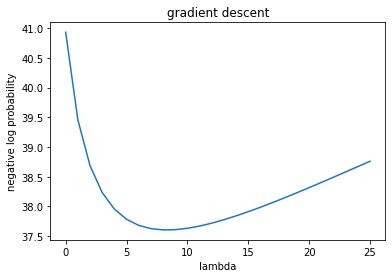

Gradient descent best lambda: 8
Gradient descent best cross validation negative log probability: 37.60456820511622
Gradient descent test accuracy: 87.27272727272727
Gradient descent test negative log probability: 33.28552433260602
Gradient descent # of iterations: 3100


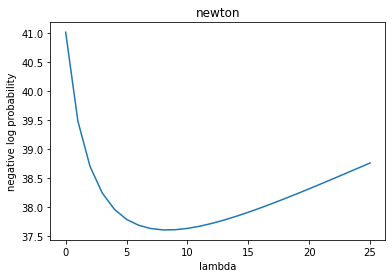

Newton best lambda: 8
Newton best cross validation negative log probability: 37.60895810456645
Newton test accuracy: 87.27272727272727
Newton test negative log probability: 33.294910005187255
Newton # of iterations: 4


In [ ]:
# load data
train_inputs, train_labels, test_inputs, test_labels = load_logistic_regression_data()

# rescale inputs in the [-1,1] range
train_inputs = (train_inputs - 8)/8
test_inputs = (test_inputs - 8)/8

# add 1 at the end of each data point
train_inputs = np.concatenate((train_inputs,np.ones((train_inputs.shape[0],1))),1)
test_inputs = np.concatenate((test_inputs,np.ones((test_inputs.shape[0],1))),1)

# rename the classes 5,6 to 0,1
train_labels = train_labels.astype(int) - 5
test_labels = test_labels.astype(int) - 5

###############################################
# logistic regression based on gradient descent
###############################################

# lambda values to be evaluated by cross validation
hyperparams = range(26)
k_folds = 10
best_lambda, best_neg_log_prob, neg_log_probabilities = cross_validation_logistic_regression(k_folds,hyperparams,train_inputs,train_labels,'gradient descent')

# plot results
plot_logistic_regression_neg_log_probabilities(neg_log_probabilities,hyperparams,'gradient descent')
print('Gradient descent best lambda: ' + str(best_lambda))
print('Gradient descent best cross validation negative log probability: ' + str(best_neg_log_prob))

# train and evaluate with best lambda
weights, n_iters = train_logistic_regression_gradient(train_inputs,train_labels,best_lambda)
neg_log_prob, accuracy = eval_logistic_regression(test_inputs, weights, test_labels)
print('Gradient descent test accuracy: ' + str(accuracy))
print('Gradient descent test negative log probability: ' + str(neg_log_prob))
print('Gradient descent # of iterations: ' + str(n_iters))

#################################################
# logistic regression based on Newton's algorithm
#################################################

# lambda values to be evaluated by cross validation
hyperparams = range(26)
k_folds = 10
best_lambda, best_neg_log_prob, neg_log_probabilities = cross_validation_logistic_regression(k_folds,hyperparams,train_inputs,train_labels,'newton')

# plot results
plot_logistic_regression_neg_log_probabilities(neg_log_probabilities,hyperparams,'newton')
print('Newton best lambda: ' + str(best_lambda))
print('Newton best cross validation negative log probability: ' + str(best_neg_log_prob))

# train and evaluate with best lambda
weights, n_iters = train_logistic_regression_newton(train_inputs,train_labels,best_lambda)
neg_log_prob, accuracy = eval_logistic_regression(test_inputs, weights, test_labels)
print('Newton test accuracy: ' + str(accuracy))
print('Newton test negative log probability: ' + str(neg_log_prob))
print('Newton # of iterations: ' + str(n_iters))


# Discussion:

### Question 1 (2 points):


#### Compare the results for gradient descent and Newton's algorithm:
Same Prediction accuracy and negative log likelihood:

*   We get almost same accuracy (87.27 %) and negative log likelihood (33.29) for our predictions from the test data, when model is trained on training dataset and weights are determined through regularized loss minimization (optimization) using “gradient descent” or “newton’s” methods.
*   This is because both methods minimize same loss function and determines almost same optimal weights for given lambda value. This also explains why we get same best cross-validated negative log likelihoods (37.6) and best lambda (8) corresponding to it from both of these methods.
*   However, number of iterations required in weights optimization varies significantly between these 2 algorithms and its comparison is covered in the subsequent paragraphs

#### Discuss the scalability of each algorithm (i.e., time and space complexity). For what type of dataset would you use gradient descent versus Newton's algorithm?
Different time and space complexity:

*   However, there are key differences between these two weights optimization methods in terms of number of basic calculations it requires to determine optimal weights and computer memory it uses. This creates important time and space complexity differences between these two optimization algorithms and hence we could determine their scalability based on these Big-O notations.
*   For instance, to compare in the terms of iterations, in our above case, “newton’s” method gives optimal weights in just 4 iterations; whereas, “gradient descent” method takes about 3100 iterations. And in our case, this results into around 10 seconds of running time for “newton’s” method vs 2 minutes for “gradient descent” based hyperparameter tuning and prediction computations. So, we can say that for our given dataset, newton’s method converges to optima quite fast compared to gradient descent method. 
*   Worth mentioning here that learning rate can also be increased in the “gradient descent” method to reduce number of iterations and to make it converge little faster, but this may sometime overshoot the target and results in oscillation between some higher value points instead of converging to minima.

Now, let’s find Time and Space Complexity for these algorithms for each iteration:

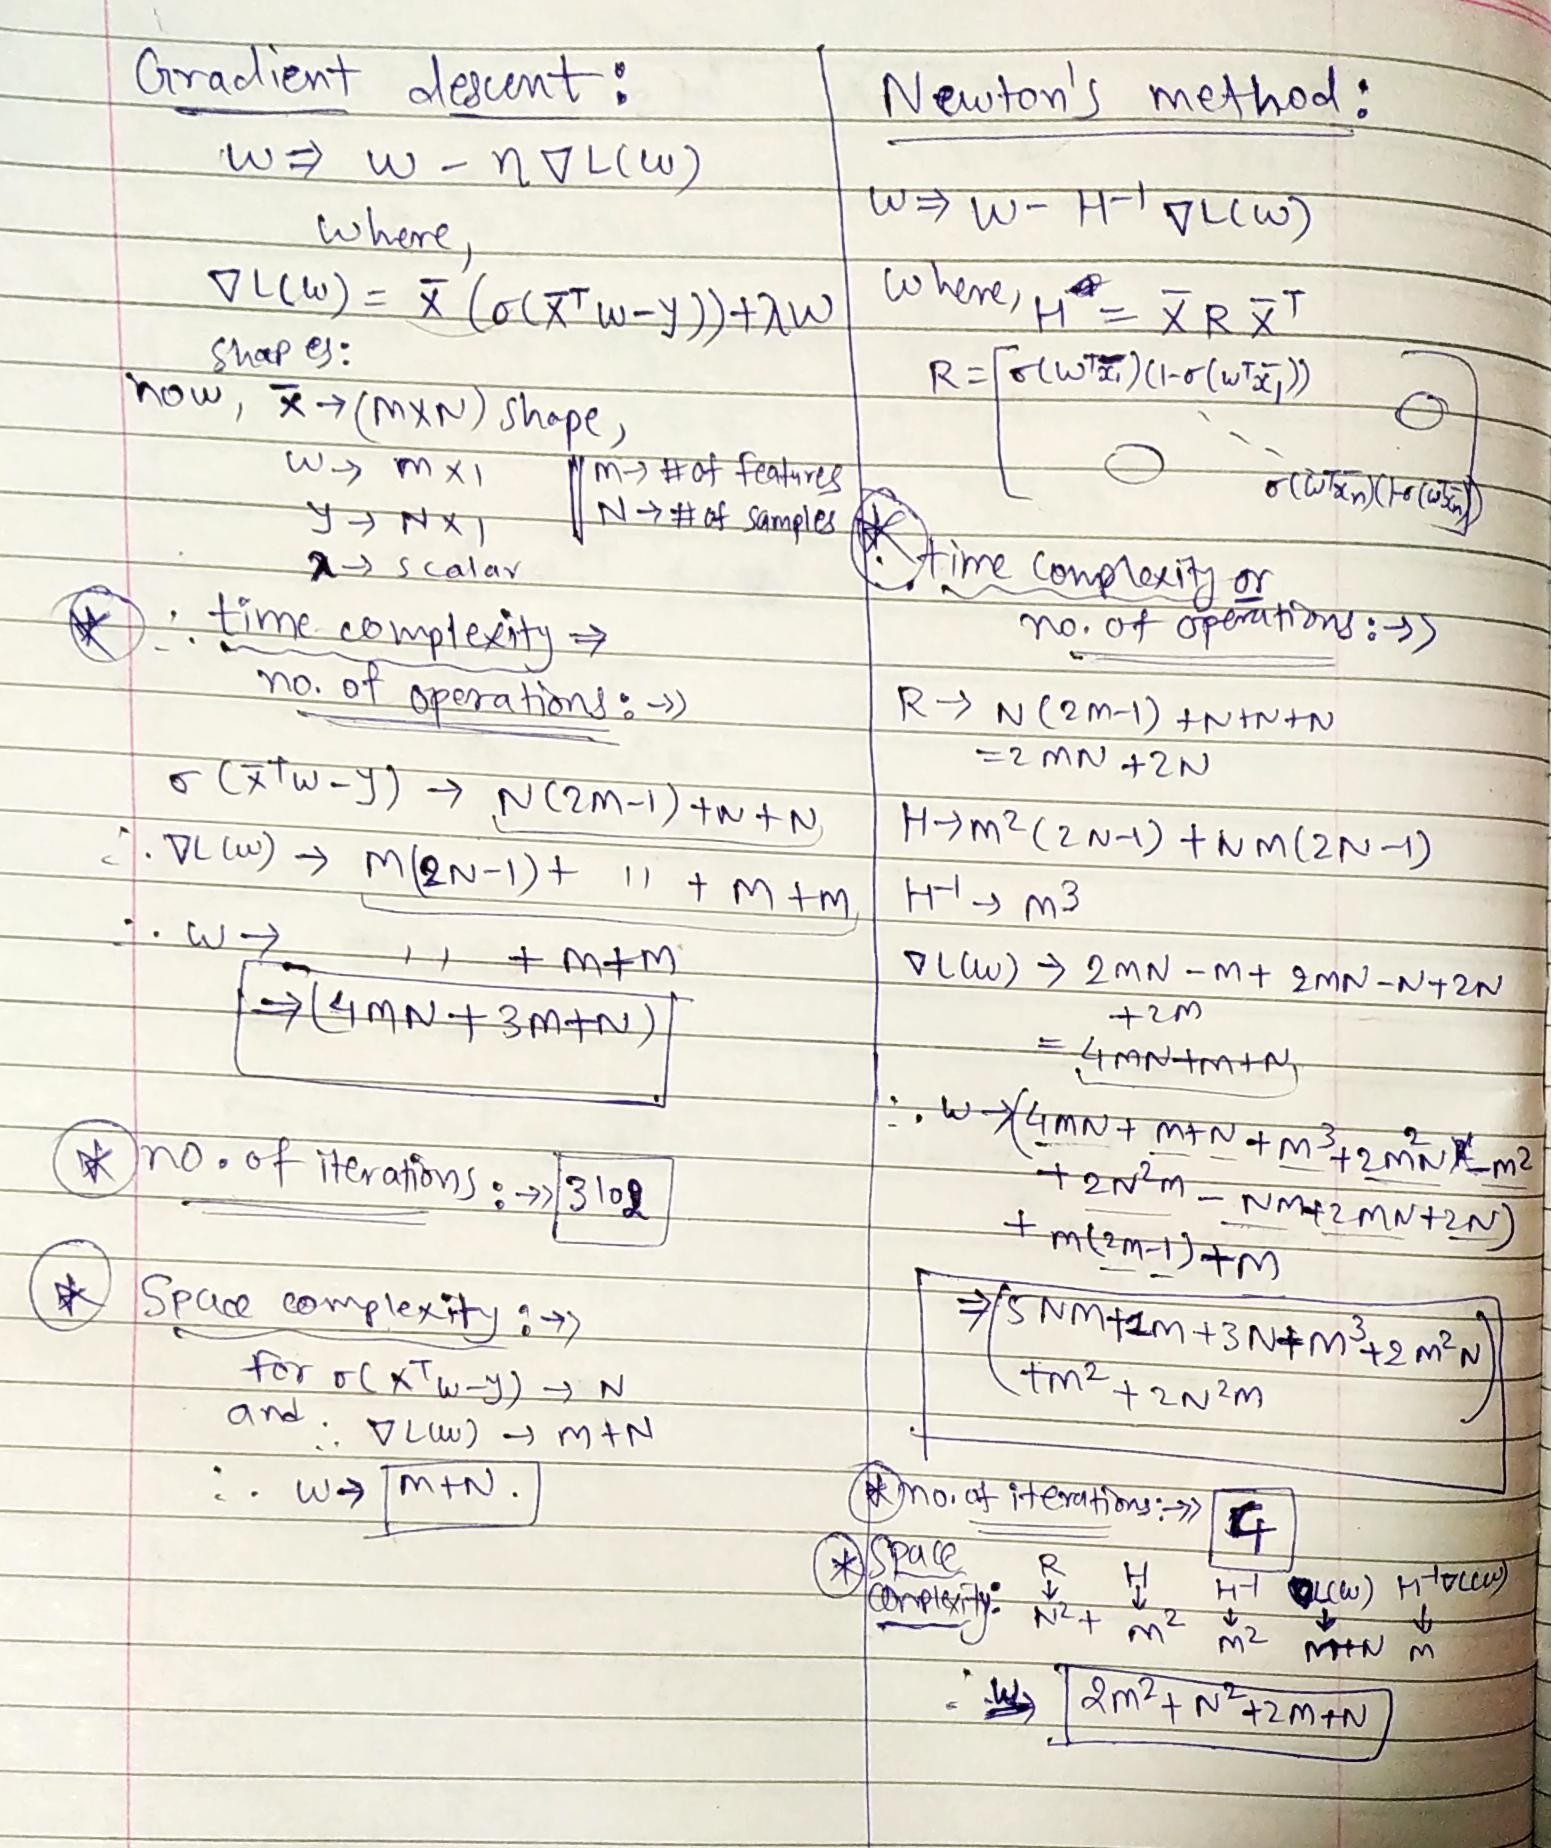




As we showed in the attached image, **“Gradient Descent Algorithm”** have **(O(M*N) x (# Iterations))** time complexity, and **O(M+N)** space complexity.
Whereas, **“Newton’s algorithm”** have **(O(M^3 + N^2) x (# Iterations))** time complexity, and **O(M^2+ N^2)** space complexity. (where, M = # of features per sample data point, and N = # of samples in the dataset)

*   So, based on our above results, we could note that “Gradient descent algorithm” has much lower (linear in M and N) time and space complexity compared to “Newton’s algorithm” (Cubic in M, and Square in N) for a single iteration, and hence “Gradient descent algorithm” would be more scalable. i.e. when either M or N or both M and N dimensions of our dataset are very high, “Gradient descent algorithm” will outperform “Newton’s algorithm” even though it takes higher number of iterations to converge to minima.
*  That being said, if dataset has lesser amount of datapoints (N) or less number of features (M) in the dataset (as we have in this assignment), it will be a trade-off between “Gradient descent algorithm” and “Newton’s algorithm” because number of iterations also comes into picture then. And hence, as we saw in this assignment, in such cases “Newton’s algorithm” could be a better choice considering its property of lesser number of iterations required to converge. 
*   Just to give you an idea, here when we did logistic regression model building with lambda hyperparameter tuning and cross validation, we had to do about **261 times** (i.e. 26 (Due to lambda tuning) x 10 (Due to 10-fold cross-validation) + 1 (for final trg with selected lambda)) of such **3100 and 4** iterations, in gradient descent and newton's method respectively. So, we can say that, in our case, for entire model building we had to perform a total of **809,100** iterations for gradient descent; whereas, this number was just **1,044** for newton's method based model training. And in our case neither N or M size is so large (just about 1000 x 64), and therefore # of iterations govern the overall time complexity of algorithms here. As a result we get here overall time complexity of about **10^9** for Newton's algorithm, whereas **55 x 10^9** for Gradient descent algorithm. So, Newton's algorithm becomes a suitable choice in this case, assuming that we are more concerned with time complexity, and little higher space complexity of the Newton's algorithm would not be a concern for us. 

### Question 2 (2 points):
#### Logistic regression finds a linear separator where as k-Nearest Neighbours (in Assignment 1) finds a non-linear separator. Compare the expressivity of the separators. Discuss under what circumstances each type of separator is expected to perform best. 

*   As we had seen in the Voronoi's diagram in KNN, depending upon K value, our KNN classifier computes euclidean distances and creates non-linear separators or partitions in space between classes.
*   On the other hand, logistic regression, attempts to divide a set of classes in space using a simple linear separator.
*   This clearly suggests that as KNN can create more complex partitions between classes, and it could be said to have more expressivity compared to logistic regression.
*   However, this does not imply that KNN is always more accurate in our class prediction task. If our data points are not linearly separable, have many outliers and have many overlaps between datapoints class spaces, then KNN may give better prediction accuracy compared logistic regression. But, if our data is linearly separable and have very less outliers, then logistic regression model fitted on it would give us better prediction accuracies compared to KNN.

#### What could explain the results obtained with KNN in comparison to the results obtained with logistic regression?

*   We had received test accuracy of 78.18 % in KNN, whereas we are getting 87.27 % test accuracy with logistic regression. This suggests that as our dataset would be linealy separable and hence it gives more accuracy with logistic regression. Accuracy is comparatively lesser in KNN because data points falling near the boundary of two classes are classified based on classes of the few nearest surrounding points, but this would not give accurate prediction, and hence accuracy suffers in such cases for KNN, whereas it gives fairly accurate predictions when model is trained with logistic regression based linear separator.





### Question 3 (3 points):
#### Is the training set used in this assignment linearly separable? To answer this question, add some code to the Jupyter Notebook that uses a logistic regression classifier to determine whether the training set is linearly separable.

*   To check linear separability of data, we will apply our trained logistic regression on entire dataset (training+testing data) and will measure the accuracy of prediction. As logistic regression model has created linear separator between class, we expect to give good prediction accuracy if our data is majorly linearly separable.


In [ ]:
# consolidate train and test data inputs
inputs = np.concatenate((train_inputs, test_inputs), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# use same optimal weights as derived through newton's optimization algorithm above
neg_log_prob, accuracy = eval_logistic_regression(inputs, weights, labels)

# check overall dataset prediction accuracy through trained logistic regression model
print('Prediction accuracy for entire dataset: ' + str(accuracy))


Prediction accuracy for entire dataset: 87.74774774774775


In [ ]:
# let's also check prediction accuracy for training dataset based on which logistic regression model is prepared
neg_log_prob, accuracy = eval_logistic_regression(train_inputs, weights, train_labels)

# check training dataset prediction accuracy through trained logistic regression model
print('Prediction accuracy for training dataset: ' + str(accuracy))

Prediction accuracy for training dataset: 87.8


#### Add some text that explains why this code can determine the linear separability of a dataset. Indicate whether the training set is linearly separable based on the results.


*   Based on above results, which says our logistic regression model was able to fit the overall as well training dataset through linear separator and correctly label or classify about 87.8 % of the dataset, which is a quite good fit, we can say that our dataset is fairly linearly separable and does not have many outliers or noise in it and both classes are not much overlapping. Had our dataset consists of many overlapping classes scenarios, we could not have achieved this much high accuracy or level of fit for classification with logistic regression model based linear separator.